# Natural Language Processing

### List 3

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from src.generate_dice_rolls import DiceRollsGenerator
from src.dice_predictors import HeuristicPredictor, HMMViterbiPredictor
from sklearn.metrics import accuracy_score

## Generate rolls

In [17]:
dice_roll_gen = DiceRollsGenerator()

In [18]:
fair_distr = (1/6,) * 6
cheat_distr = (1/10,)*5 + (1/2,)
p_fair_to_cheat = 0.04
p_cheat_to_fair = 0.05
n_rolls = 10000

In [19]:
rolls, dices = dice_roll_gen.generate_rolls(fair_distr, cheat_distr,
                                            p_fair_to_cheat, p_cheat_to_fair,
                                            n_rolls)

In [20]:
# Show some rolls and dices
print(rolls[:10])
print(dices[:10])

[2 4 1 1 2 6 2 2 6 5]
['u' 'u' 'u' 'n' 'n' 'n' 'u' 'u' 'u' 'u']


### Show fair and cheat rolls on the bar plot

In [21]:
def bar_plot_rolls_with_dices(rolls: np.array, dices: np.array) -> plt.bar:
    fair_rolls = np.argwhere(dices == 'u').ravel()
    cheat_rolls = np.argwhere(dices == 'n').ravel()

    plt.figure(figsize=(20, 5))
    plt.bar(fair_rolls, rolls[fair_rolls], color='g')
    plt.bar(cheat_rolls, rolls[cheat_rolls], color='r')
    plt.xlabel('rolls', size=20)
    plt.ylabel('values', size=20)

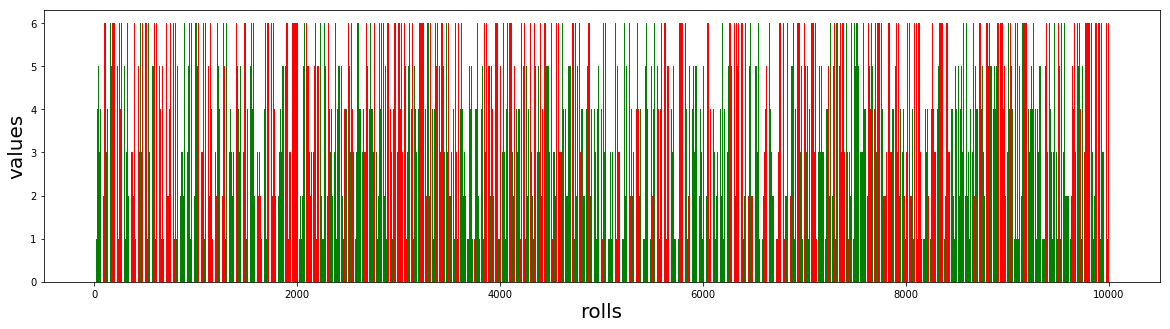

In [22]:
bar_plot_rolls_with_dices(rolls, dices)

## Make predictions of the dices — values are observable states, dices are hidden states

### Heuristic predictions based on the 6 density

In [23]:
heuristic_predictor = HeuristicPredictor()

In [24]:
for ratio in np.linspace(1/6, 5/6, 10):
    
    # Compute the predictions
    dices_heur = heuristic_predictor.predict(rolls, p_cheat_to_fair,
                                             min_six_subset_ratio=ratio)
    
    # Print the score with the coresponding ratio
    print(accuracy_score(dices, dices_heur), ratio)

0.5807419258074192 0.16666666666666666
0.6239376062393761 0.24074074074074076
0.6678332166783322 0.3148148148148148
0.7147285271472853 0.38888888888888895
0.7292270772922708 0.462962962962963
0.7496250374962504 0.5370370370370371
0.7396260373962604 0.6111111111111112
0.7139286071392861 0.6851851851851852
0.6935306469353064 0.7592592592592593
0.6854314568543146 0.8333333333333334


### Hidden Markov Model predictions

In [25]:
# Define transition matrix
A = {
    'u': {'u': 1-p_fair_to_cheat, 'n': p_fair_to_cheat},
    'n': {'u': p_cheat_to_fair, 'n': 1-p_cheat_to_fair},
}

In [26]:
# Define emission matrix
B = {
    'u': dict(zip(range(1, 7), fair_distr)),
    'n': dict(zip(range(1, 7), cheat_distr)),
}

In [27]:
hmm = HMMViterbiPredictor()

In [28]:
# Prob of fair start state is 1
start_states = np.array([1., 0.])

In [30]:
# Need to avoid numerical errors
for const in np.linspace(5, 7, 10):

    # Compute the predictions
    dices_hmm = hmm.predict(rolls, A, B, np.array([1., 0.]), delta_const=const)
    
    # Print the score with the coresponding const
    print(accuracy_score(dices, dices_hmm), const)

0.7165283471652835 5.0
0.8022197780221978 5.222222222222222
0.8268173182681732 5.444444444444445
0.8268173182681732 5.666666666666667
0.8268173182681732 5.888888888888889
0.8268173182681732 6.111111111111111


/home/aleksander/Documents/Repos/NLP/list3/src/dice_predictors.py:84: RuntimeWarning: overflow encountered in double_scalars
  new_delta_cand = a_ij * b_ijo_t * delta_i * delta_const


0.6826317368263174 6.333333333333333
0.6137386261373863 6.555555555555555
0.5807419258074192 6.777777777777778
0.5742425757424258 7.0
